# Model Development

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('processed_data.csv')
df_original = pd.read_csv('new_features_data.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12136 entries, 0 to 12135
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gender                                12136 non-null  float64
 1   Loyalty Member                        12136 non-null  float64
 2   Favorite Product Type_Laptop          12136 non-null  float64
 3   Favorite Product Type_Smartphone      12136 non-null  float64
 4   Favorite Product Type_Smartwatch      12136 non-null  float64
 5   Favorite Product Type_Tablet          12136 non-null  float64
 6   Preferred Payment Method_Cash         12136 non-null  float64
 7   Preferred Payment Method_Credit Card  12136 non-null  float64
 8   Preferred Payment Method_Debit Card   12136 non-null  float64
 9   Preferred Payment Method_PayPal       12136 non-null  float64
 10  Preferred Payment Method_Paypal       12136 non-null  float64
 11  Preferred Shipp

In [116]:
df = df[['Gender', 'Loyalty Member', 'Age', 'Recency', 'Frequency', 'Monetary', 'Churn', 'Total Orders', 'Cancellation Rate', 'Add-on Frequency']]
df_original = df_original[['Gender', 'Loyalty Member', 'Age', 'Recency', 'Frequency', 'Monetary', 'Churn', 'Total Orders', 'Cancellation Rate', 'Add-on Frequency']]

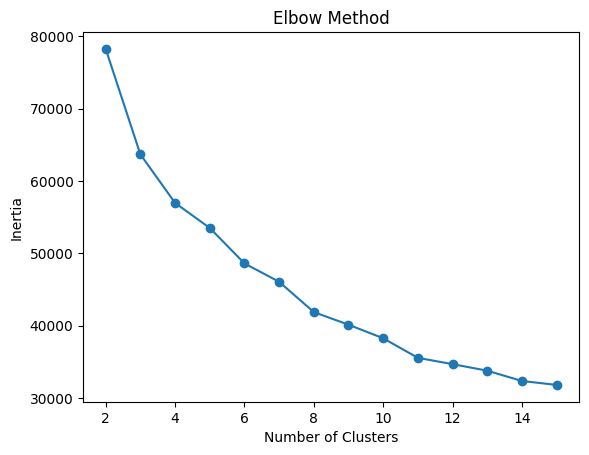

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 16), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [118]:
optimal_k = 13
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)
df['Cluster'] = clusters
df_original['Cluster'] = clusters

sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score for K-Means: {sil_score}")

Silhouette Score for K-Means: 0.41584498411745896


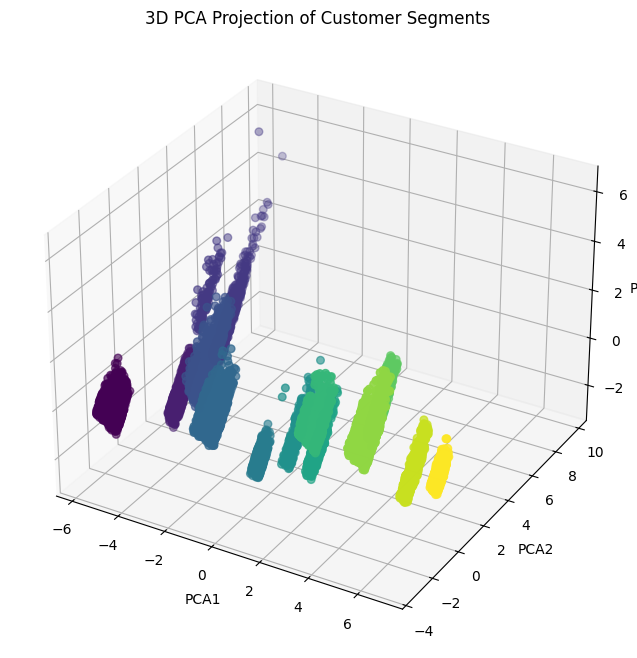

In [119]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df_original['Cluster'], cmap='viridis', s=30)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA Projection of Customer Segments')
plt.show()

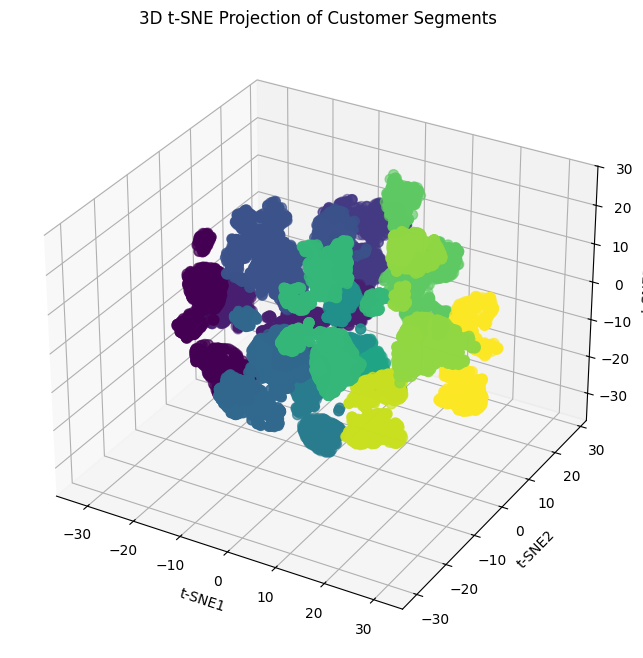

In [120]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(df)

df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]
df['TSNE3'] = tsne_result[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TSNE1'], df['TSNE2'], df['TSNE3'], c=df_original['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')
ax.set_title('3D t-SNE Projection of Customer Segments')
plt.show()

In [121]:
cluster_characteristics = df_original.groupby('Cluster').agg({
    'Gender': lambda x: x.mode()[0],
    'Loyalty Member': lambda x: x.mode()[0],
    'Age': 'mean',   
    'Recency': 'mean',       
    'Monetary': 'mean',
    'Frequency': 'mean',        
    'Total Orders': 'mean',  
    'Add-on Frequency': 'mean',
    'Cancellation Rate': 'mean',
}).reset_index()

In [122]:
cluster_characteristics

,Cluster,Gender,Loyalty Member,Age,Recency,Monetary,Frequency,Total Orders,Add-on Frequency,Cancellation Rate
0,0,Female,No,65.449438,291.879862,3014.957917,1.058773,1.058773,0.996975,0.302506
1,1,Male,No,65.200650,123.013810,6892.303347,2.238018,2.238018,0.802735,30.178716
2,2,Male,No,48.254484,128.312780,14326.041368,3.634529,3.634529,0.746833,32.387092
3,3,Male,No,49.037530,244.116828,6863.570321,2.200363,2.200363,0.768614,31.759483
4,4,Male,No,48.796184,287.527320,3159.167034,1.069384,1.069384,0.992628,100.000000
5,5,Male,No,65.354724,126.566845,3340.661194,1.008913,1.008913,1.000000,0.000000
6,6,Male,No,50.501706,125.276451,3890.995461,1.290102,1.290102,0.058020,94.027304
7,7,Male,No,51.095982,125.910714,3352.691161,1.131696,1.131696,0.000000,0.000000
8,8,Female,No,33.212248,283.739933,2986.345856,1.062919,1.062919,0.995386,0.251678
9,9,Female,No,32.902479,121.535537,6709.635992,2.233884,2.233884,0.782231,29.703857


In [30]:
import joblib

# Save the model to a file
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

Cluster Descriptions:

1.	Cluster 0: “Older Female Shoppers with Lower Spend”
•	Customer Profile: Older female customers with moderate recency and low monetary spend. They have low frequency of purchase and a moderate cancellation rate.
•	Behavior: Customers in this cluster are less frequent shoppers and make relatively low-value purchases, possibly due to limited spending power or occasional shopping habits. They also have a moderate cancellation rate, indicating indecisiveness.
•	Campaign Strategy: Marketing campaigns targeting product recommendations based on past purchases or emphasizing budget-friendly options might resonate with this group.

2.	Cluster 1: “Older Male Shoppers with High Spend and Moderate Frequency”
•	Customer Profile: Male customers who are older and make occasional high-value purchases with a moderate level of frequency.
•	Behavior: These customers spend significantly more than Cluster 0, yet their purchase frequency is moderate. Their higher cancellation rate suggests they might hesitate before completing purchases.
•	Campaign Strategy: Offering deals on high-value products or emphasizing “big savings on your next purchase” could work well. Alternatively, targeted offers on quality products or services may appeal to their purchasing habits.

3.	Cluster 2: “Young Male Shoppers with High Frequency and High Spend”
•	Customer Profile: Young male customers with the highest monetary spend and frequent purchases.
•	Behavior: These customers have the highest overall spend and tend to shop frequently, suggesting they are engaged and loyal buyers. They also tend to have a moderate cancellation rate, possibly reflecting their interest in higher-end products.
•	Campaign Strategy: Targeting them with loyalty programs, personalized recommendations, or exclusive high-end products will drive engagement. Special promotions on high-value items could keep them coming back.

4.	Cluster 3: “Middle-Aged Male Shoppers with Moderate Spend”
•	Customer Profile: Male customers of moderate age, who have average recency, moderate spending, and frequency.
•	Behavior: Customers in this group are moderately engaged, with moderate spending habits. They have a decent cancellation rate, which might indicate occasional reconsideration before making purchases.
•	Campaign Strategy: Offering a mix of moderate-priced items and occasional promotions could appeal to them. Recommending products based on their purchasing history can improve conversion.

5.	Cluster 4: “Male Shoppers with Low Frequency and High Cancellation Rates”
•	Customer Profile: Male customers who have low frequency and a high cancellation rate, yet moderate monetary spending.
•	Behavior: Despite spending moderately, these customers rarely make purchases and have a very high cancellation rate, indicating they may often abandon carts or delay purchases.
•	Campaign Strategy: Target them with incentives to complete their purchases, such as “limited-time offers” or “one-time discounts” to minimize cancellation rates.

6.	Cluster 5: “Older Male Shoppers with Low Frequency and High Cancellation Rates”
•	Customer Profile: Older male customers who shop infrequently and exhibit very high cancellation rates.
•	Behavior: These customers do not buy frequently and tend to cancel their orders. They may need more persuasive marketing or incentives to drive purchases.
•	Campaign Strategy: Focusing on trust-building measures, such as money-back guarantees or clear return policies, could help minimize cancellations. Offering more appealing product offers may also convince them to buy.

7.	Cluster 6: “Middle-Aged Male Shoppers with Low Frequency and Very High Cancellation Rates”
•	Customer Profile: Middle-aged male customers who have relatively low frequency of shopping but an extremely high cancellation rate.
•	Behavior: This group is highly likely to cancel their orders, despite making some purchases. Their lower frequency could suggest they need additional motivation to make a purchase.
•	Campaign Strategy: Offering enticing deals, warranties, and assurance in the form of better customer support may appeal to them and reduce cancellations.

8.	Cluster 7: “Middle-Aged Male Shoppers with Low Spend and Low Cancellation Rates”
•	Customer Profile: These customers are middle-aged, have low spending, but also low cancellation rates.
•	Behavior: They make purchases infrequently but tend to follow through with their purchases. Their low spend suggests a price-sensitive or occasional shopper profile.
•	Campaign Strategy: Offering promotions on everyday items or smaller, low-cost products might attract them, as well as loyalty discounts for repeat customers.

9.	Cluster 8: “Young Female Shoppers with Low Spend and Moderate Cancellation Rates”
•	Customer Profile: Young female customers with moderate recency and low spend.
•	Behavior: This group tends to shop less frequently but has a moderate level of cancellations. They seem to be somewhat indecisive but still engage with the platform occasionally.
•	Campaign Strategy: Offering appealing “budget-friendly” deals or targeting them with personalized product recommendations might drive purchases while minimizing cancellations.

10.	Cluster 9: “Young Female Shoppers with High Spend and Moderate Frequency”
•	Customer Profile: These customers are young females with relatively high spending and moderate purchasing frequency.
•	Behavior: They make purchases more frequently and tend to spend more compared to Cluster 8, but their cancellation rate is still moderate.
•	Campaign Strategy: Focusing on promotions that highlight value for money, or discounts on their next purchase, could appeal to them. Personalized offers based on their previous purchases would also likely resonate.

11.	Cluster 10: “Middle-Aged Male Shoppers with Low Spend and Very Low Cancellation Rates”
•	Customer Profile: Middle-aged males who have low spending and very low cancellation rates.
•	Behavior: These customers are consistent buyers with a low risk of canceling purchases, though their overall spend is relatively low.
•	Campaign Strategy: Offering steady, reliable product suggestions or discount bundles